# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Data

In [2]:
Airlines = pd.read_excel("EastWestAirlines.xlsx", sheet_name="data")

In [3]:
Airlines.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [4]:
#Renaming Columns
Airlines = Airlines.rename({'ID#':'ID', 'Award?':'Award'}, axis=1)
Airlines.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [5]:
#Setting ID column as Index Column
Airlines.set_index('ID', inplace= True)
Airlines

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1
4018,64385,0,1,1,1,981,5,0,0,1395,1
4019,73597,0,3,1,1,25447,8,0,0,1402,1


ID --Unique ID

Balance--Number of miles eligible for award travel

Qual_mile--Number of miles counted as qualifying for Topflight status

cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:
cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:
cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:

1 = under 5,000
2 = 5,000 - 10,000
3 = 10,001 - 25,000
4 = 25,001 - 50,000
5 = over 50,000

Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months

Bonus_trans--Number of non-flight bonus transactions in the past 12 months

Flight_miles_12mo--Number of flight miles in the past 12 months

Flight_trans_12--Number of flight transactions in the past 12 months

Days_since_enrolled--Number of days since enrolled in flier program

Award--whether that person had award flight (free flight) or not

# Data Exploration

In [6]:
Airlines.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [7]:
Airlines.shape

(3999, 11)

In [8]:
Airlines.size

43989

In [9]:
Airlines.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3999 entries, 1 to 4021
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award              3999 non-null   int64
dtypes: int64(11)
memory usage: 374.9 KB


There are no null values. Lets just confirm that.

In [10]:
Airlines.isnull()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
4017,False,False,False,False,False,False,False,False,False,False,False
4018,False,False,False,False,False,False,False,False,False,False,False
4019,False,False,False,False,False,False,False,False,False,False,False


In [11]:
Airlines.isnull().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award                0
dtype: int64

Confirmed. There are no null values.

In [12]:
#Duplicate values
Airlines.duplicated().sum()

1

In [13]:
Airlines[Airlines.duplicated()]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
3899,1000,0,1,1,1,0,0,0,0,1597,0


We have a duplicate value. Just to be sure we will search for those 2 records.

In [14]:
Airlines[Airlines['Days_since_enroll']==1597]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
3088,25676,0,1,1,1,0,0,0,0,1597,0
3343,37569,0,1,1,1,3850,4,250,1,1597,1
3393,1000,0,1,1,1,0,0,0,0,1597,0
3899,1000,0,1,1,1,0,0,0,0,1597,0
3910,22029,0,1,1,1,2882,14,0,0,1597,0
3912,50416,0,1,1,1,4574,13,450,1,1597,0
3915,134882,0,3,1,1,15717,14,0,0,1597,0


Here records with ID 3393 and 3899 are same record (3899 is duplicate of 3393). So we drop one.

In [15]:
#copy data set so it doesn't affect the original dataset
data = Airlines.copy()
data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1
4018,64385,0,1,1,1,981,5,0,0,1395,1
4019,73597,0,3,1,1,25447,8,0,0,1402,1


In [16]:
#droping duplicate record
data = data.drop_duplicates()

In [17]:
#unique values for each Feature
for feature in data.columns:
    print(feature, data[feature].unique())

Balance [28143 19244 41354 ... 73597 54899  3016]
Qual_miles [    0  2024   500   967  5031  1182  1776  1745   733  2398  1250  2706
  2998  2556  6727  1374  1952  2000  1178  7210  2015  2066  2128  2919
  1024   589  2880  3445   862  8264  1604  2975   588  1199  2586  3490
  5051  1115   810  4081  2376   948  6286  2253  2565  2643  8559  3818
  8753  9325  4301  1094  3692  1896  1000  1388  4116  2505 11148   888
 10098   745  5124  2408   867  1846  1514  8019   763  4924  1697  1739
  2370  6168   925  2288  1467  1704  2329  1099  1505  6920  2139  4481
  1448   250   783  2360  2364  2396  1362  5583  1440  5009   909  2395
  3867  1452  6057  2081  1112  2704  7663  3953  5513  2454   957  4704
  7558  2562  4727  5368  1754   651 10074  2900  1692  2600  1526  3508
   629  1651  1674  2433  1249  2543  2738  1619  6153  4361  2947  2194
   719  2611  1121  2576  4670  1761  6396  4844  2788  2178  3418  7487
  4903  1621  2092  1082  2305  3649   899  7257  4877  3071  3

# Exploratory Data Analytics

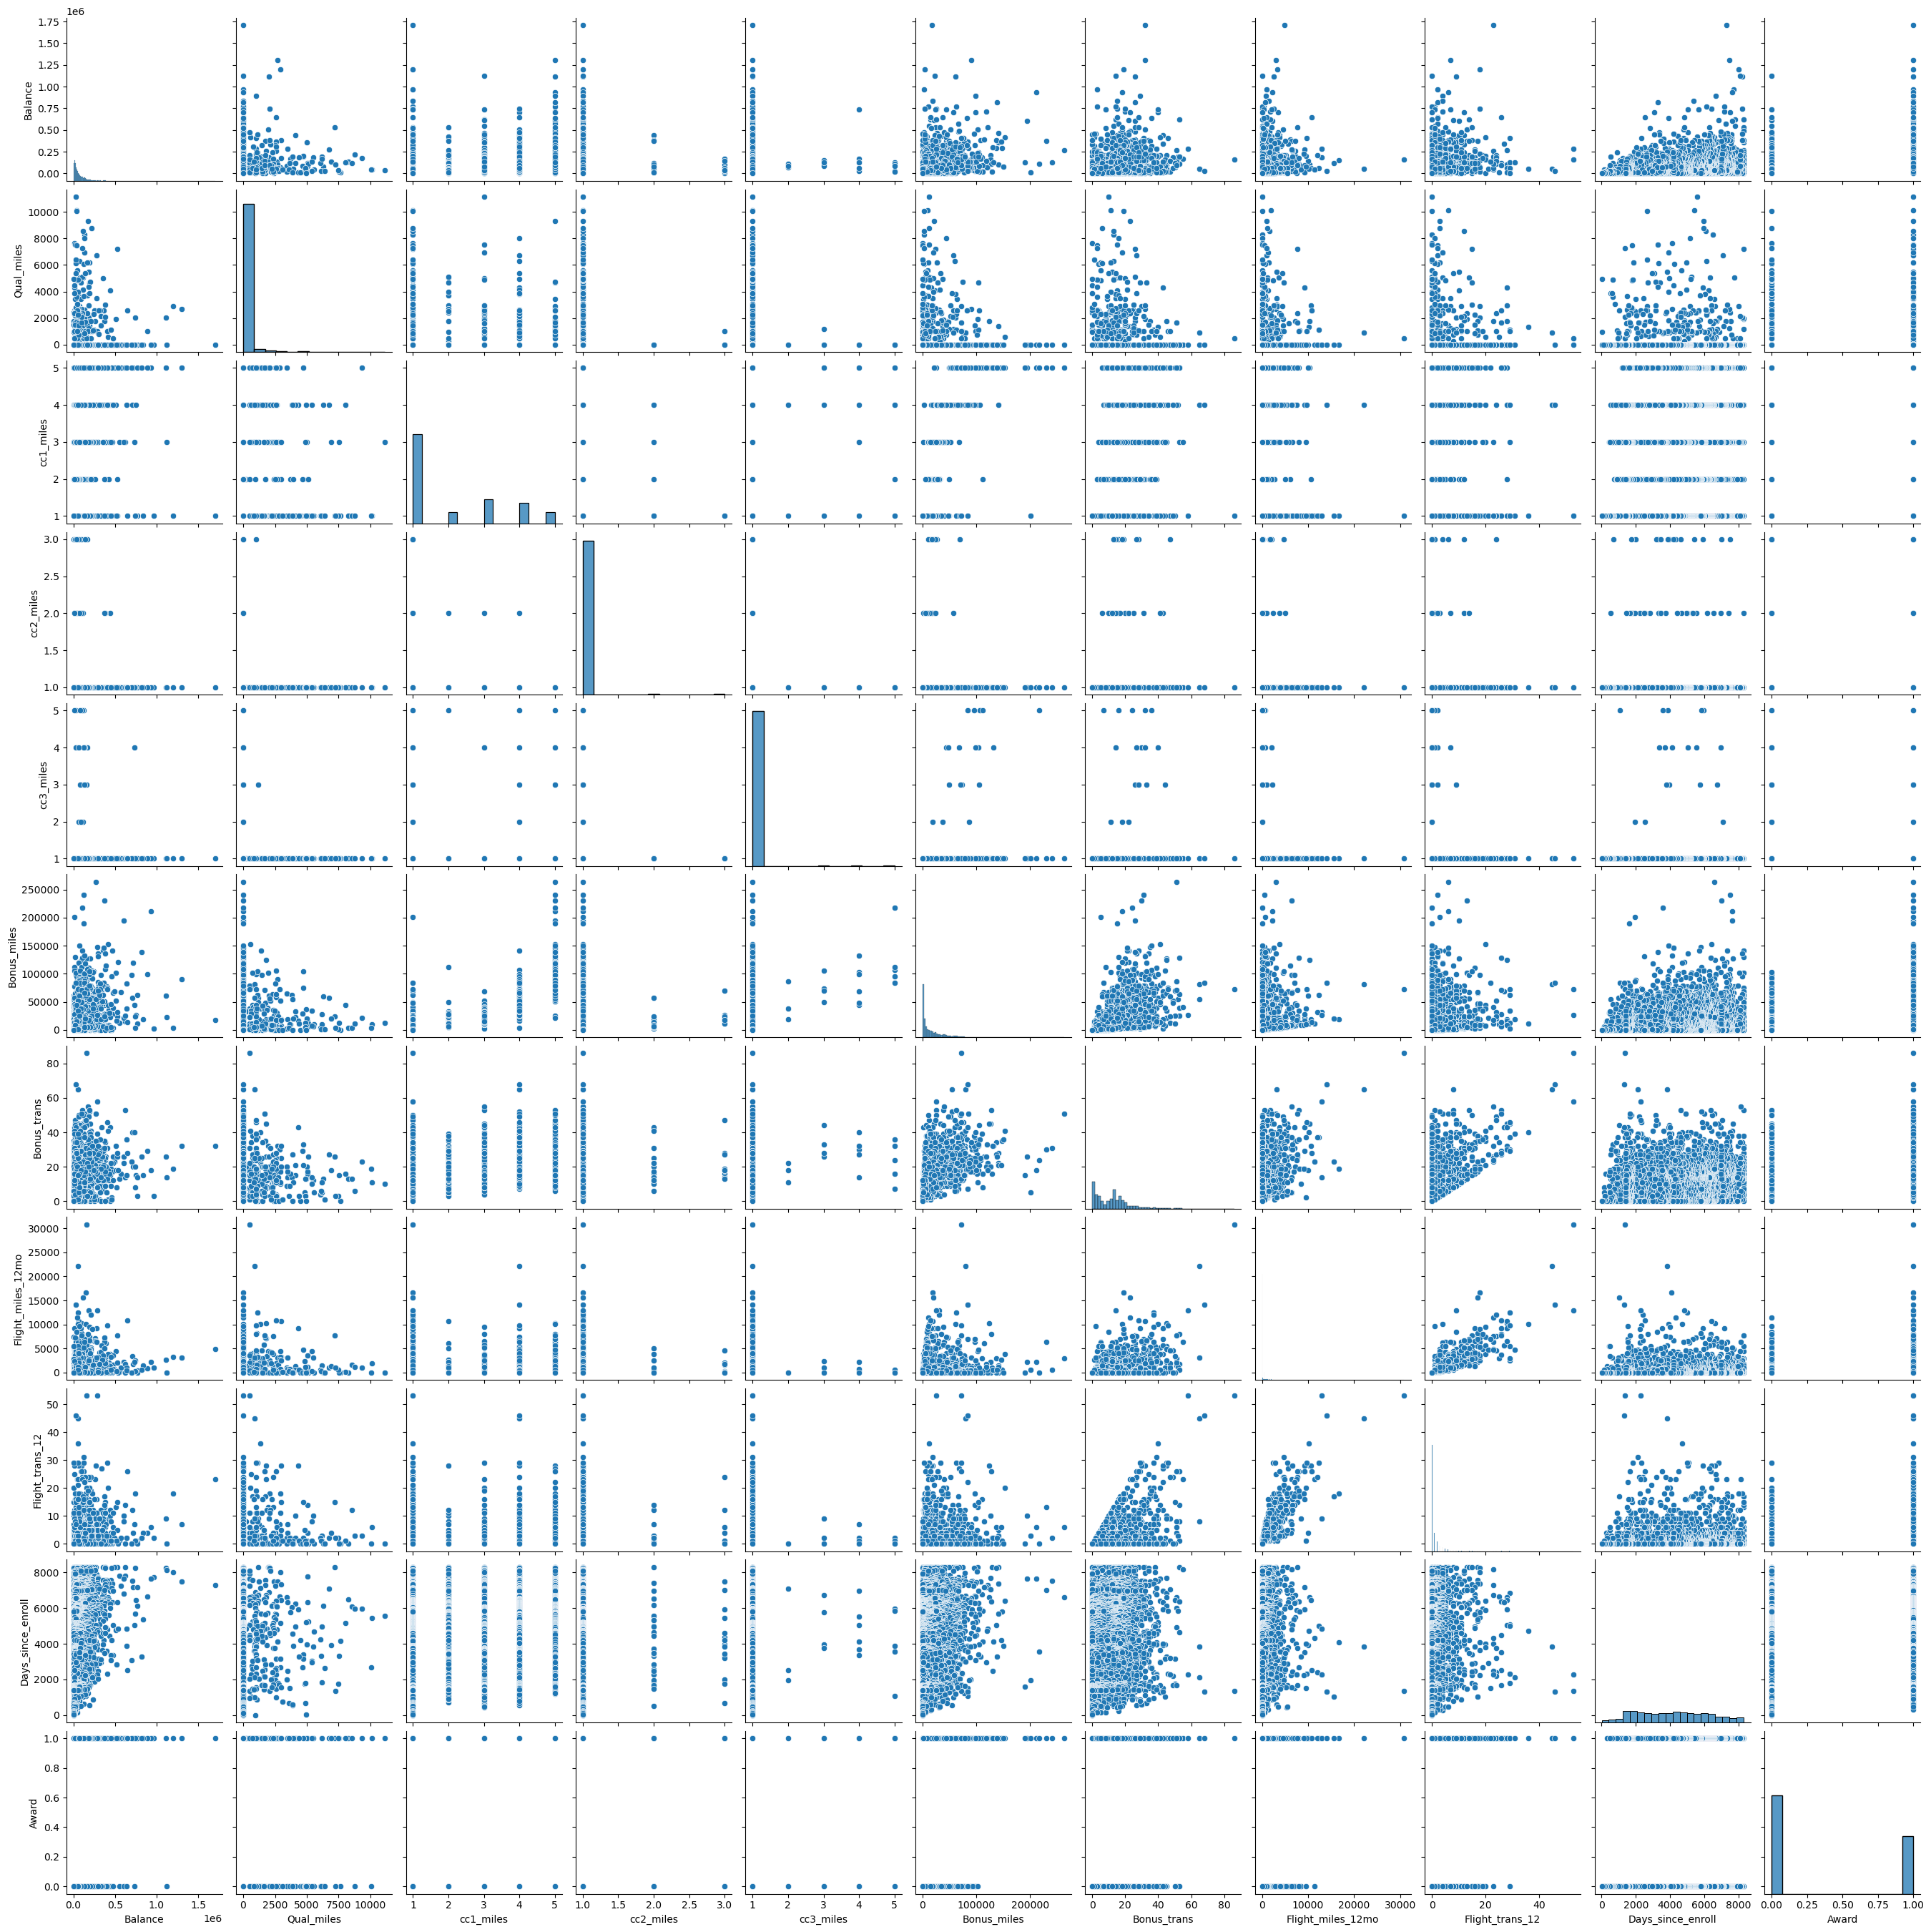

In [18]:
sns.pairplot(data)

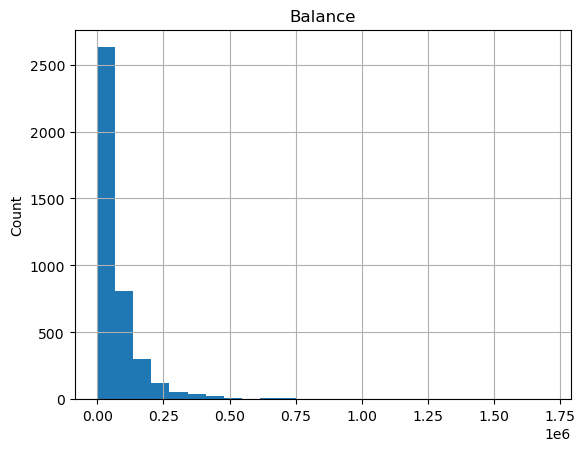

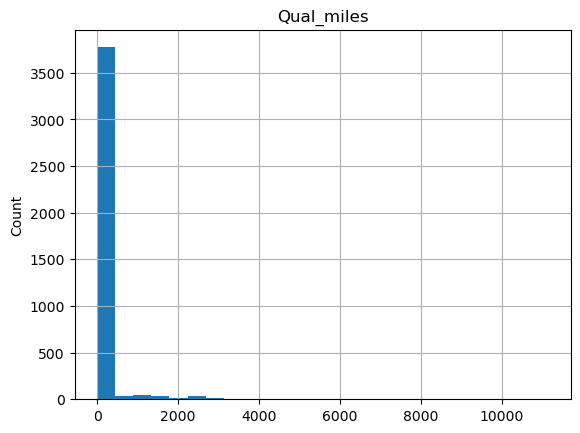

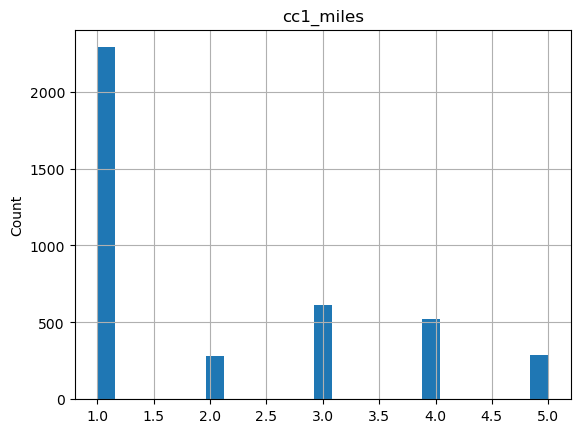

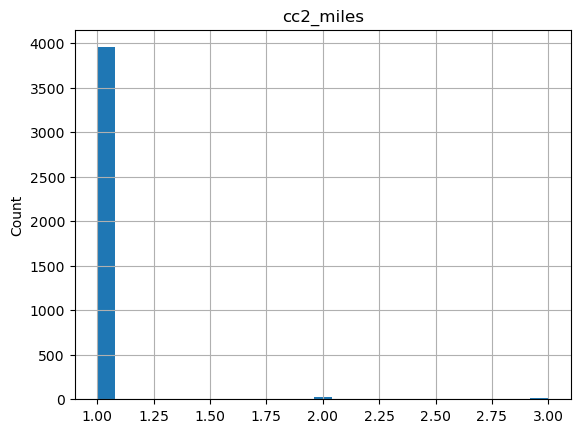

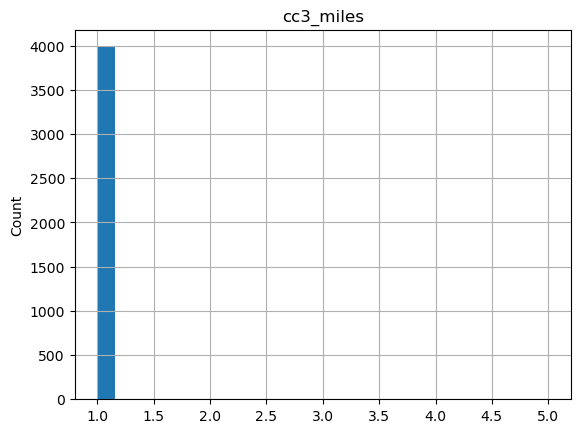

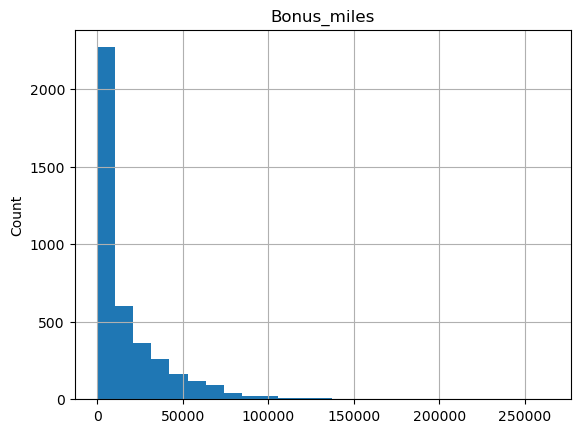

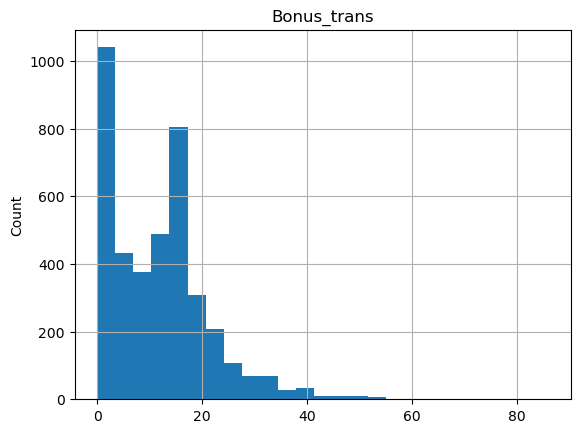

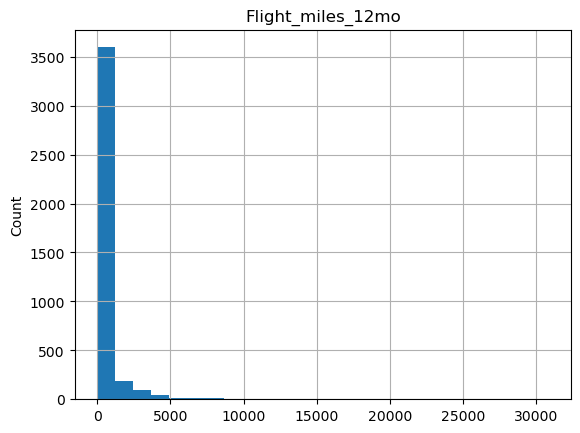

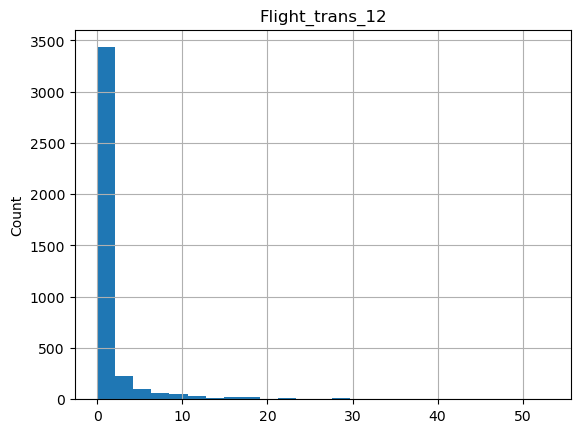

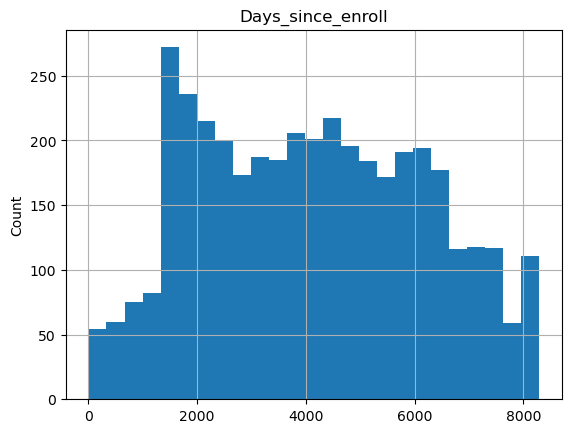

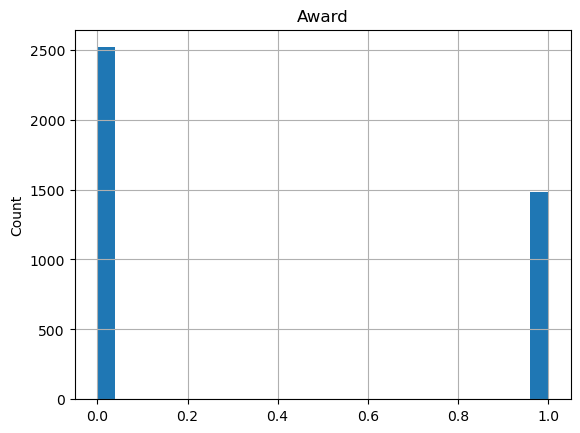

In [19]:
#function for histogram for every feature 
for feature in data.columns:
    data[feature].hist(bins=25)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


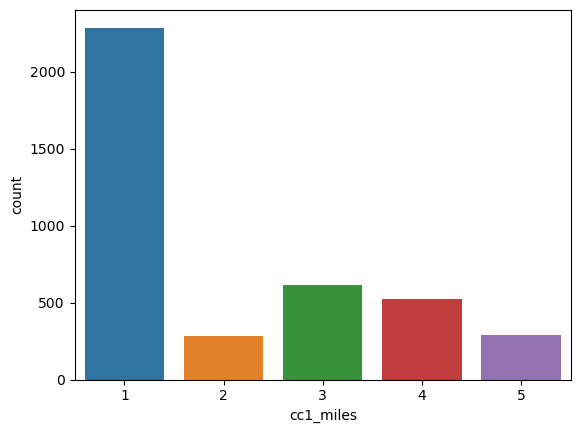

In [20]:
sns.countplot(data['cc1_miles'])
plt.show()

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


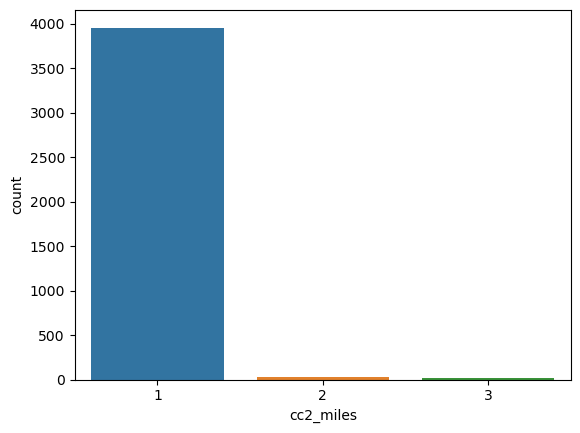

In [21]:
sns.countplot(data['cc2_miles'])
plt.show()

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


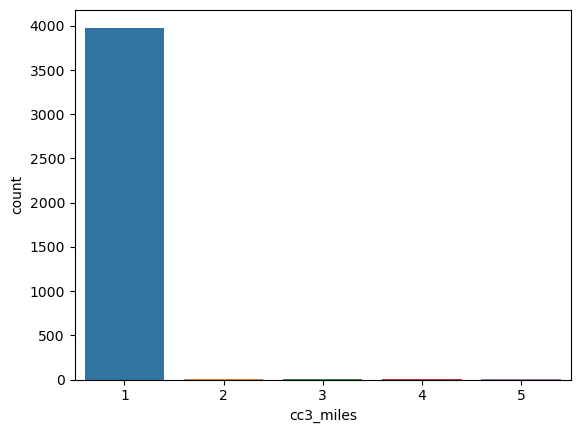

In [22]:
sns.countplot(data['cc3_miles'])
plt.show()

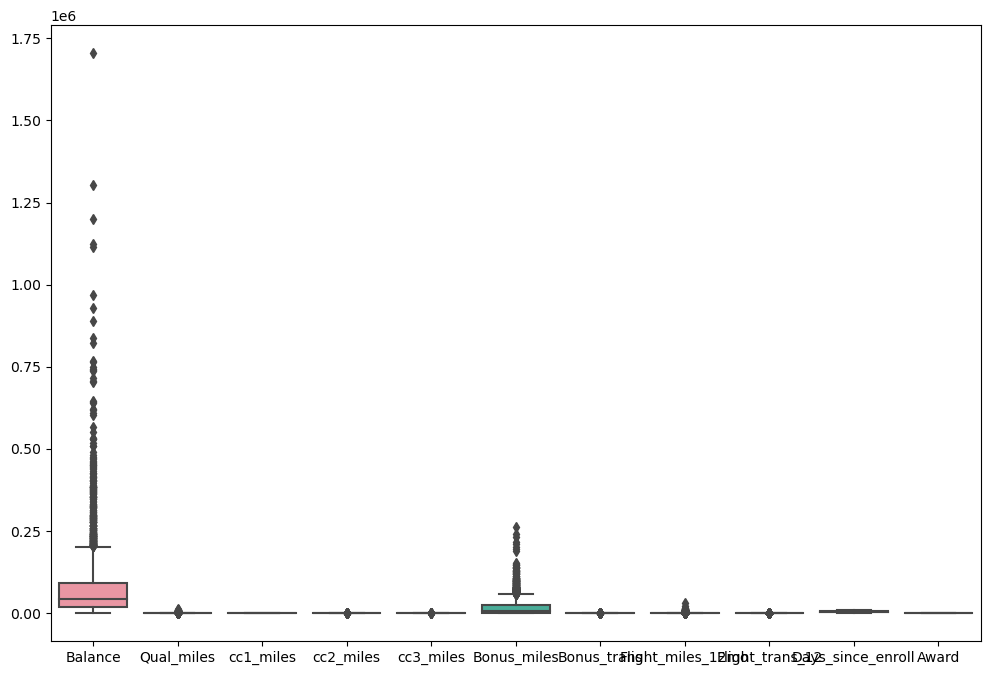

In [23]:
#Outlier Detection
plt.figure(figsize=(12,8))
sns.boxplot(data=data)
plt.show()

In [24]:
data.columns

Index(['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award'],
      dtype='object')

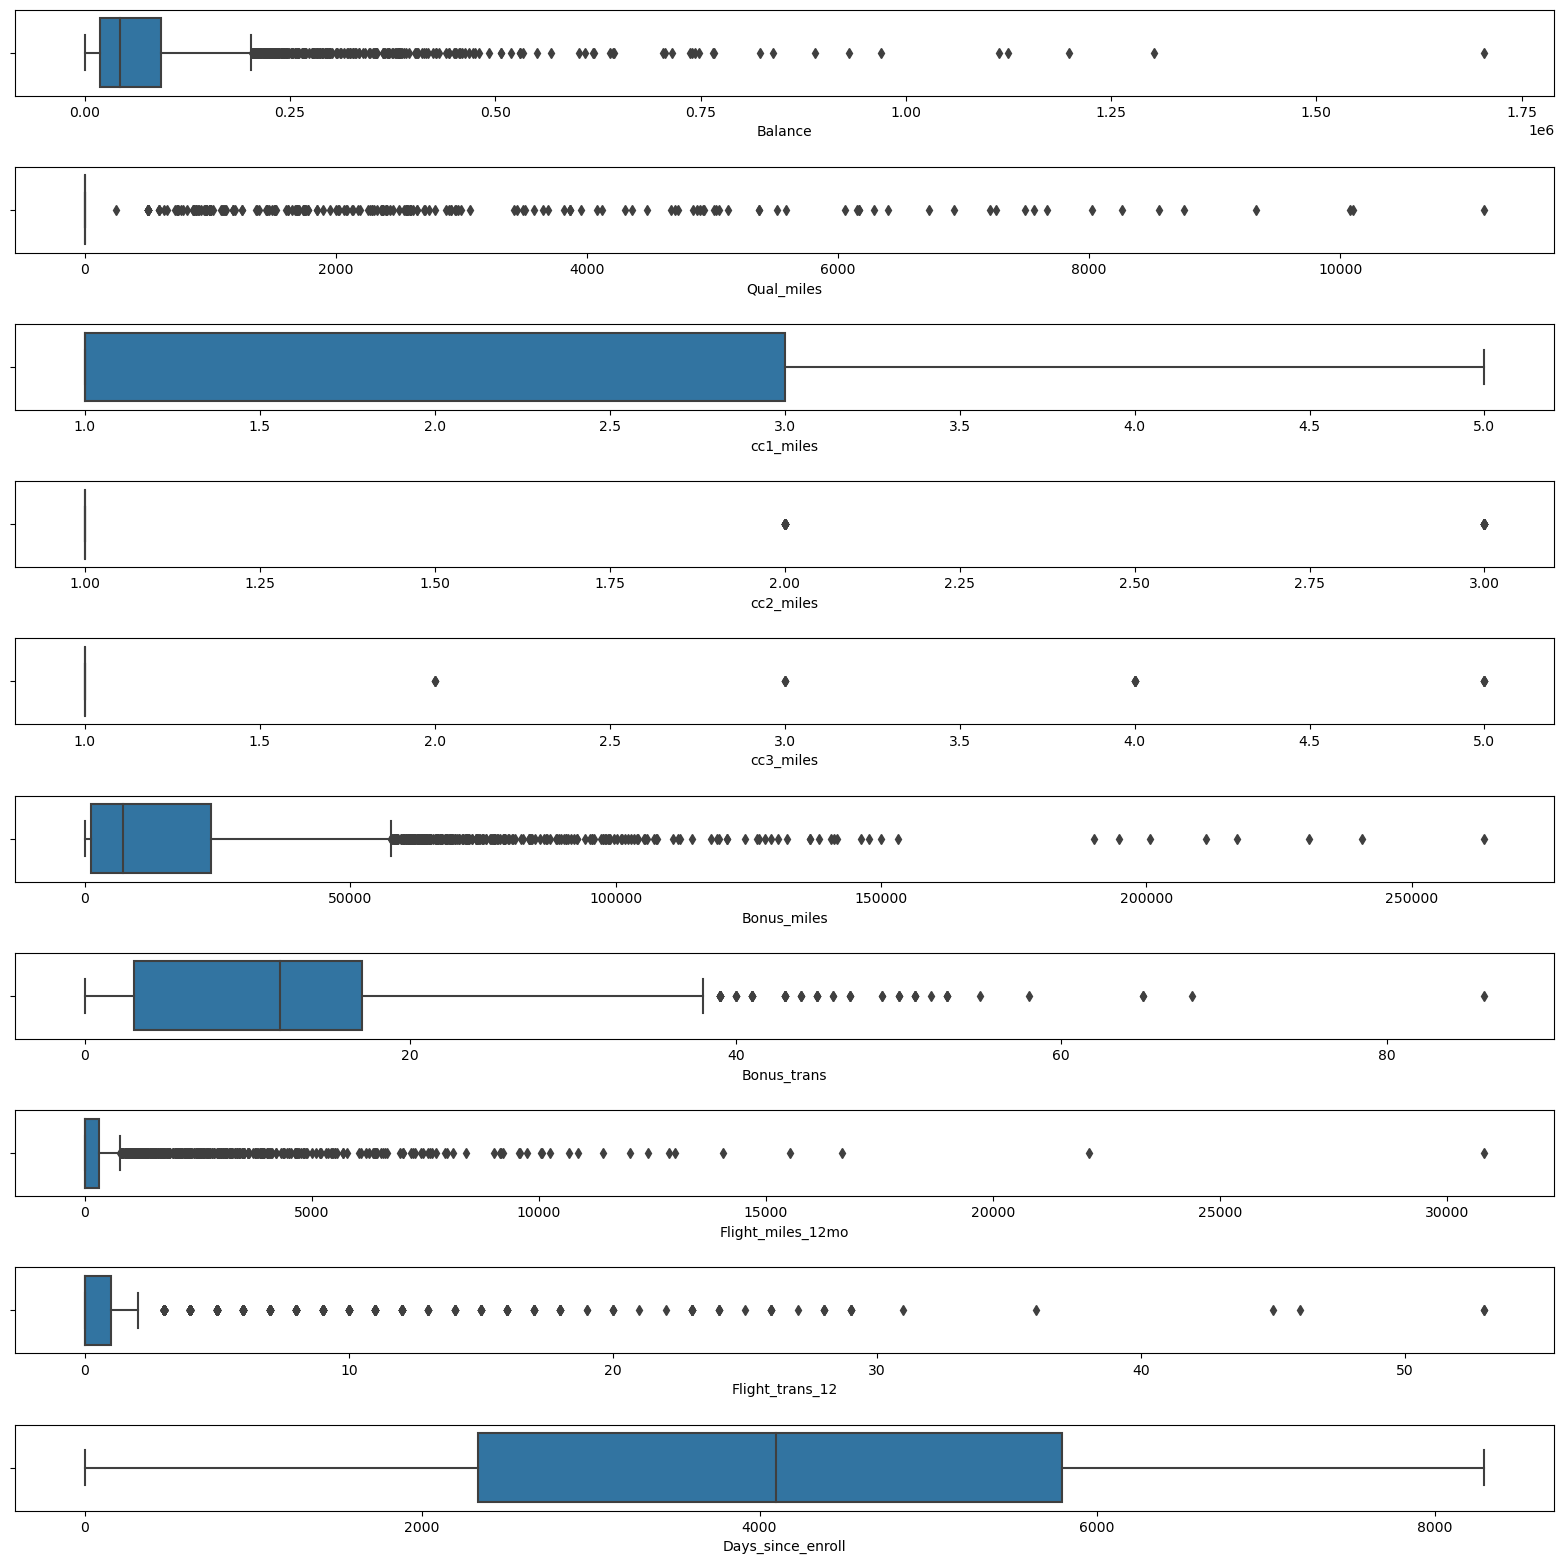

In [25]:
#Creating horizontal boxplots to vizualize it more properly
fig,axes = plt.subplots(10,figsize=(16,16))
sns.boxplot(x='Balance', data=data, ax=axes[0])
sns.boxplot(x='Qual_miles', data=data, ax=axes[1])
sns.boxplot(x='cc1_miles', data=data, ax=axes[2])
sns.boxplot(x='cc2_miles', data=data, ax=axes[3])
sns.boxplot(x='cc3_miles', data=data, ax=axes[4])
sns.boxplot(x='Bonus_miles', data=data, ax=axes[5])
sns.boxplot(x='Bonus_trans', data=data, ax=axes[6])
sns.boxplot(x='Flight_miles_12mo', data=data, ax=axes[7])
sns.boxplot(x='Flight_trans_12', data=data, ax=axes[8])
sns.boxplot(x='Days_since_enroll', data=data, ax=axes[9])
plt.tight_layout(pad=2.0) #to give more space between each graph 
plt.show()

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


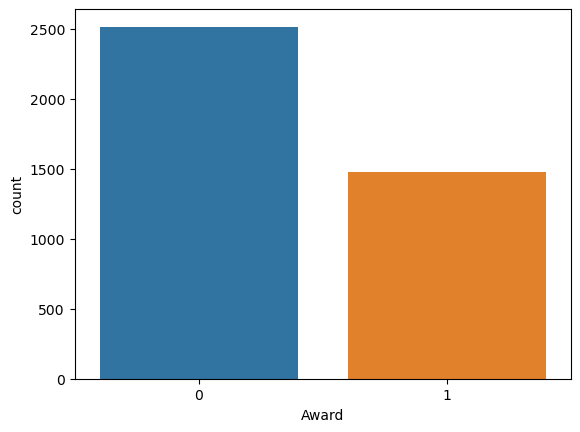

In [26]:
sns.countplot(data['Award'], order=data['Award'].value_counts().index)
plt.show()

In [27]:
print("Percentage of Customers having Awards: ",((((len (data[data.Award == 1]))/(len(data.Award)))*100)))
print("Percentage of Customers who don't have Awards: ",((((len(data[data.Award == 0]))/(len(data.Award)))*100)))

Percentage of Customers having Awards:  37.04352176088044
Percentage of Customers who don't have Awards:  62.95647823911956


37 percentage of the clients have Awards and 63 percentage of the clients dont.

In [28]:
#correlation coefficient
data.corr()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
Balance,1.000000,0.108696,0.338252,-0.008822,0.035234,0.403410,0.324797,0.217509,0.255656,0.262975,0.178380
Qual_miles,0.108696,1.000000,0.007896,-0.013928,-0.007782,0.030990,0.050678,0.126761,0.143990,0.017259,0.095228
cc1_miles,0.338252,0.007896,1.000000,-0.068247,0.060548,0.825177,0.608867,0.037310,0.041267,0.230674,0.335358
cc2_miles,-0.008822,-0.013928,-0.068247,1.000000,-0.006168,-0.003987,0.064381,0.010590,0.028276,-0.005838,0.005314
cc3_miles,0.035234,-0.007782,0.060548,-0.006168,1.000000,0.204136,0.097312,-0.001783,-0.001122,0.010815,0.023474
Bonus_miles,0.403410,0.030990,0.825177,-0.003987,0.204136,1.000000,0.603114,0.183492,0.185211,0.210232,0.373421
Bonus_trans,0.324797,0.050678,0.608867,0.064381,0.097312,0.603114,1.000000,0.377190,0.432341,0.160953,0.333747
Flight_miles_12mo,0.217509,0.126761,0.037310,0.010590,-0.001783,0.183492,0.377190,1.000000,0.869189,0.037178,0.217671
Flight_trans_12,0.255656,0.143990,0.041267,0.028276,-0.001122,0.185211,0.432341,0.869189,1.000000,0.059161,0.247862
Days_since_enroll,0.262975,0.017259,0.230674,-0.005838,0.010815,0.210232,0.160953,0.037178,0.059161,1.000000,0.187936


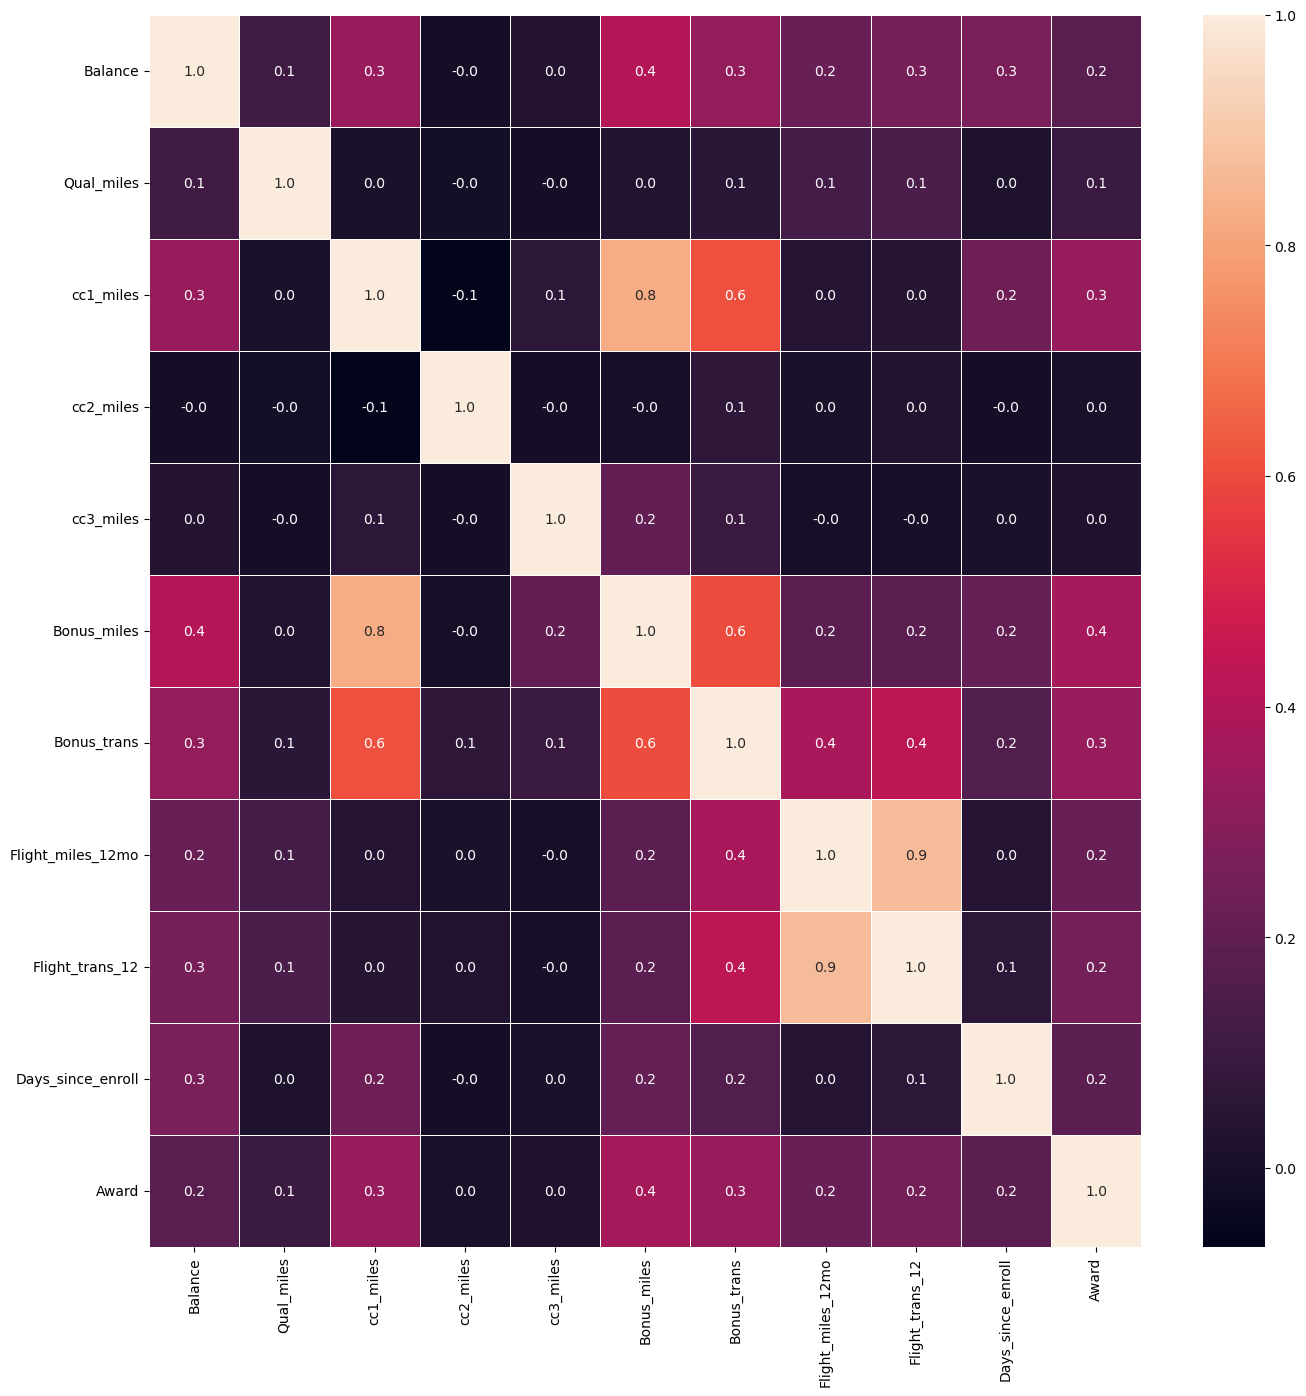

In [29]:
#Heatmap for visualization of Correlation
fig, ax = plt.subplots(figsize=(16,16))
sns.heatmap(data.corr(), annot=True, fmt=".1f", linewidths=".5", ax=ax)
plt.show()

Here are some points to be noted:-

   cc1_miles and Bonus_miles are positively correlated
   
   cc1_miles and Bonus_trans are positively correlated
   
   Bonus_miles and Bonus_trans are positively correlated
   
   Flight_miles_12mo and Flight_trans_12 are positively correlated
    
In other words:

<b>Number of miles earned with freq. flyer credit card in the past 12 months</b> <i>and</i> <b>Number of miles earned from non-flight bonus transactions in the past 12 months</b>
    
<b>Number of miles earned with freq. flyer credit card in the past 12 months</b> <i>and</i> <b>Number of non-flight bonus transactions in the past 12 months</b>
    
<b>Number of miles earned from non-flight bonus transactions in the past 12 months</b> <i>and</i> <b>Number of non-flight bonus transactions in the past 12 months</b>
    
<b>Number of flight miles in the past 12 months</b> <i>and</i> <b>Number of flight transactions in the past 12 months</b>

They are <b>Positively correlated</b> with each other.

# Data Preprocessing

In [18]:
#Data Standardization
from sklearn.preprocessing import StandardScaler
StandardScaler = StandardScaler()
std_data = StandardScaler.fit_transform(data)
std_data.shape

(3998, 11)

In [19]:
#Data Normalization
from sklearn.preprocessing import MinMaxScaler
MinMaxScaler = MinMaxScaler()
norm_data = MinMaxScaler.fit_transform(data)
norm_data.shape

(3998, 11)

# KMeans Clustering

K-Means Clustering is a Iterative process. Our aim is to assign one class to every datapoint.

Here we are going to use the concept of centroids.






K-Means is a centroid-based, and distance-based algorithm.

The main objective of the K-Means algorithm is to minimize the sum of distances between the points and their respective cluster centroid.

The first step in k-means is to pick the number of clusters, k.

Then choose k number of centroids randomly and calculate the distance of every point from this k centroids.

Assign the points to the cluster who has minimun distance with the respective centroid.

After Assigning each of the points to one of the centroids, we will recalculate the centroids of recently assigned points in the cluster. We will get new centroids. Then we will iterate this process until one of the following conditions are satisfied:-

   1. Centroids of newly formed clusters do not change
   
   2. Points remain in the same cluster
   
   3. Maximum number of iterations are reached
   
For Deciding number of clusters we can use <b>Elbow Graph</b>.

Elbow graph is a graph of No. of clusters (K value) VS WCSS (Within Cluster Sum of Squares)

As we have unlabeled data we cannot validate our predictions as we did in supervised learning. To validate our prediction/classifications we can use <b>Silhouette coefficient</b>.

Silhouette coefficient can be interpreted as follow:

Observations with a large Si (almost 1) are very well clustered.

A small Si (around 0) means that the observation lies between two clusters.

Observations with a negative Si are probably placed in the wrong cluster.



In [83]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

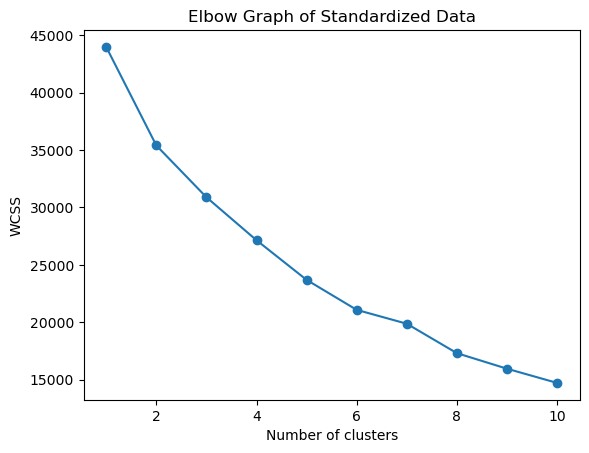

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


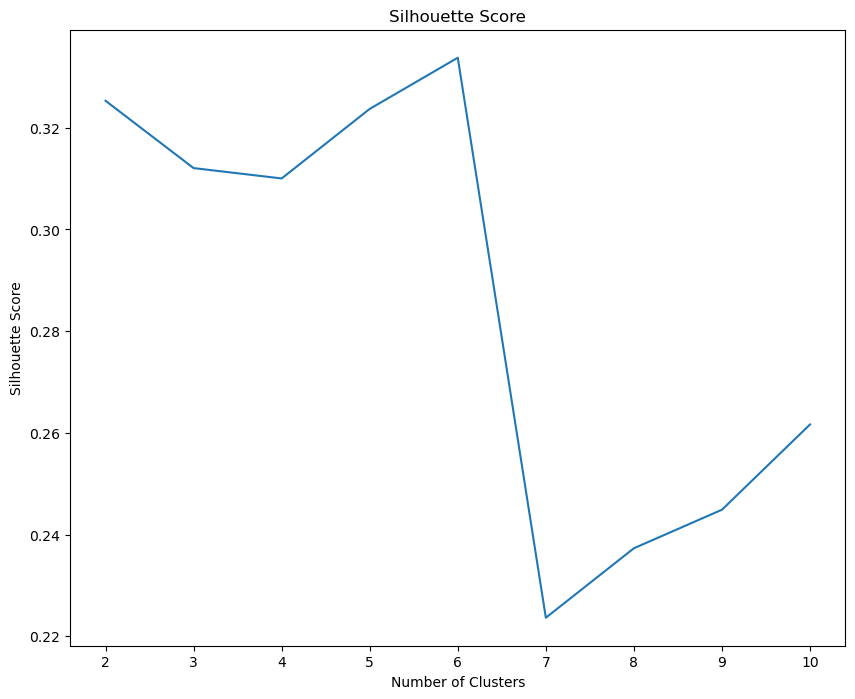

In [32]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

n_clusters1 = [2,3,4,5,6,7,8,9,10]
wcss=[]
sil_score_sd=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state = 0) #we use random state so that we can get same output each time run the code
    kmeans.fit(std_data)
    wcss.append(kmeans.inertia_)
    if i==1:
        continue
    sil_score_sd.append(silhouette_score(std_data, kmeans.labels_))
    
sil_score_sd

plt.plot(range(1,11),wcss)
plt.scatter(range(1,11),wcss)
plt.title('Elbow Graph of Standardized Data')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

fig , ax = plt.subplots(figsize=(10,8))
ax = sns.lineplot(n_clusters1, sil_score_sd, ax=ax, data = std_data)
ax.set_title("Silhouette Score")
ax.set_xlabel("Number of Clusters")
ax.set_ylabel("Silhouette Score")
plt.show()

In [33]:
sil_score_sd

[0.32531882107641713,
 0.3120743629337082,
 0.31003837126661404,
 0.3237128248552113,
 0.33378006995858245,
 0.22365222966492318,
 0.23731472601789896,
 0.24489425763143474,
 0.26166264707392667]

With refernce with the graphs above we can take 6 as the optimal number of clusters for standardized data. Silhouette score is highest and elbow graph also shows no significant decrese after 6 number of clusters. 

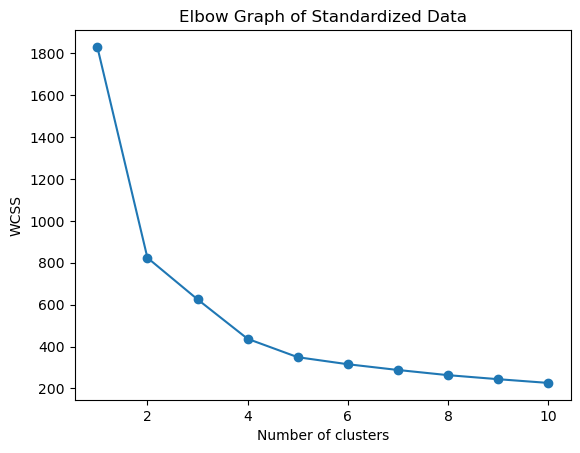

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


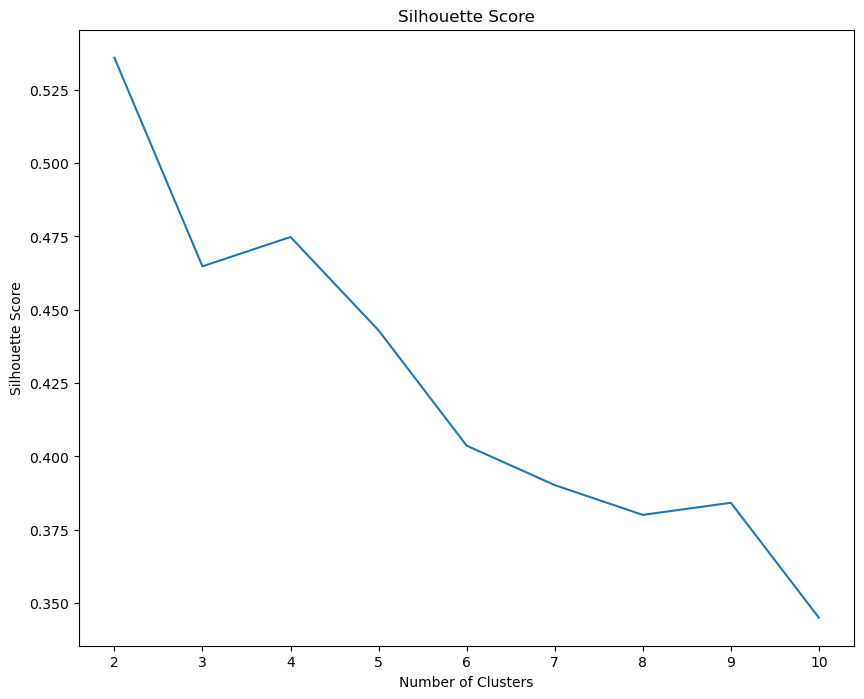

In [34]:
wcss=[]
sil_score_nd=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state = 0) #we use random state so that we can get same output each time run the code
    kmeans.fit(norm_data)
    wcss.append(kmeans.inertia_)
    if i==1:
        continue
    sil_score_nd.append(silhouette_score(norm_data, kmeans.labels_))
    
sil_score_nd    
    
plt.plot(range(1,11),wcss)
plt.scatter(range(1,11),wcss)
plt.title('Elbow Graph of Standardized Data')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

fig , ax = plt.subplots(figsize=(10,8))
ax = sns.lineplot(n_clusters1, sil_score_nd, ax=ax, data = norm_data)
ax.set_title("Silhouette Score")
ax.set_xlabel("Number of Clusters")
ax.set_ylabel("Silhouette Score")
plt.show()

In [35]:
sil_score_nd

[0.535888544052936,
 0.4647998281121121,
 0.47479527849897574,
 0.44297877952308873,
 0.40369357042668985,
 0.3902543534131158,
 0.38009284361093826,
 0.3842221803674774,
 0.3450504359554641]

With refernce with the graphs above we can take 2 as the optimal number of clusters for Normalized data. Silhouette score is highest and elbow graph also shows no significant decrese after 2 number of clusters. 

But taking 2 clusters would be much less. So it is more resonable to take 6 clusters with standardized data.

# Building Kmeans algorithm with 6 clusters and standaradized data

In [36]:
#Building Kmeans Model
clusters_new = KMeans(6, random_state= 0)
clusters_new.fit(std_data)

KMeans(n_clusters=6, random_state=0)

In [37]:
#Cluster Assignments
clusters_new.labels_

array([2, 2, 2, ..., 1, 2, 2])

In [38]:
#Adding Cluster column to original dataset
Kalgos = data.copy()
Kalgos['Cluster_ID'] = clusters_new.labels_
Kalgos

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Cluster_ID
ID,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,2
2,19244,0,1,1,1,215,2,0,0,6968,0,2
3,41354,0,1,1,1,4123,4,0,0,7034,0,2
4,14776,0,1,1,1,500,1,0,0,6952,0,2
5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1,2
4018,64385,0,1,1,1,981,5,0,0,1395,1,2
4019,73597,0,3,1,1,25447,8,0,0,1402,1,1


In [39]:
#Centroids of each clusters (11 dimensional 6 clusters)
clusters_new.cluster_centers_

array([[ 1.13661978,  0.41416471,  0.13434996, -0.09825429, -0.06277446,
         0.6561826 ,  1.70528239,  3.77057434,  4.00160023,  0.27124922,
         0.88372079],
       [ 0.43360655, -0.11304557,  1.20989562, -0.09825429, -0.05450669,
         0.92790005,  0.75243243, -0.08073137, -0.0896464 ,  0.37051107,
         0.57831847],
       [-0.2944391 , -0.12884258, -0.6016064 , -0.09825429, -0.06072325,
        -0.51689575, -0.49353627, -0.18636708, -0.19846289, -0.19781849,
        -0.34994003],
       [-0.04706705, -0.15626333, -0.66838569,  9.03710982, -0.06277446,
        -0.1018366 ,  0.61758448,  0.08745745,  0.22023229, -0.0727739 ,
         0.0515894 ],
       [ 0.63950059, -0.08446932,  1.02183982, -0.09825429, 15.64433492,
         3.1793166 ,  1.7144102 ,  0.0332068 ,  0.05959833,  0.2395819 ,
         0.33731815],
       [ 0.45689596,  6.73023291, -0.0434189 , -0.09825429, -0.06277446,
         0.06353524,  0.06505958,  0.3595715 ,  0.39411338, -0.07153328,
         0.387

In [40]:
#renaming clusters
Kalgos['Cluster_ID']=Kalgos['Cluster_ID'].replace(0, 'Cluster 1')
Kalgos['Cluster_ID']=Kalgos['Cluster_ID'].replace(1, 'Cluster 2')
Kalgos['Cluster_ID']=Kalgos['Cluster_ID'].replace(2, 'Cluster 3')
Kalgos['Cluster_ID']=Kalgos['Cluster_ID'].replace(3, 'Cluster 4')
Kalgos['Cluster_ID']=Kalgos['Cluster_ID'].replace(4, 'Cluster 5')
Kalgos['Cluster_ID']=Kalgos['Cluster_ID'].replace(5, 'Cluster 6')
Kalgos

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Cluster_ID
ID,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,Cluster 3
2,19244,0,1,1,1,215,2,0,0,6968,0,Cluster 3
3,41354,0,1,1,1,4123,4,0,0,7034,0,Cluster 3
4,14776,0,1,1,1,500,1,0,0,6952,0,Cluster 3
5,97752,0,4,1,1,43300,26,2077,4,6935,1,Cluster 2
...,...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1,Cluster 3
4018,64385,0,1,1,1,981,5,0,0,1395,1,Cluster 3
4019,73597,0,3,1,1,25447,8,0,0,1402,1,Cluster 2


In [41]:
Kalgos.groupby('Cluster_ID').agg(['mean'])

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Cluster_ID,,,,,,,,,,,
Cluster 1,188155.664336,464.573427,2.244755,1.000000,1.000000,32995.580420,27.979021,5739.692308,16.552448,4679.251748,0.797203
Cluster 2,117176.916331,58.446500,3.720837,1.000000,1.001609,39485.872084,18.811746,346.617860,1.032180,4887.485921,0.649236
Cluster 3,43899.574007,43.575612,1.229844,1.000000,1.000401,4646.073004,6.855596,199.240273,0.621340,3707.224629,0.200963
Cluster 4,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349
Cluster 5,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333
Cluster 6,119660.491803,5351.065574,2.000000,1.000000,1.000000,18683.475410,12.229508,963.639344,2.868852,3971.491803,0.557377


In [42]:
Kalgos['Cluster_ID'].value_counts()

Cluster 3    2493
Cluster 2    1243
Cluster 1     143
Cluster 6      61
Cluster 4      43
Cluster 5      15
Name: Cluster_ID, dtype: int64

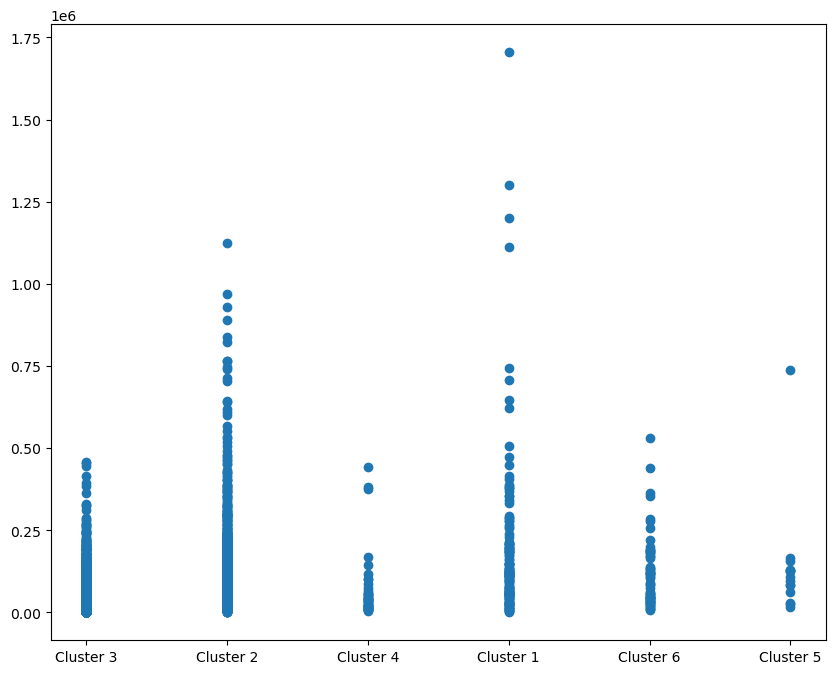

In [43]:
#plotting the clusters
plt.figure(figsize=(10,8))
plt.scatter(Kalgos['Cluster_ID'], Kalgos['Balance'])
plt.show()

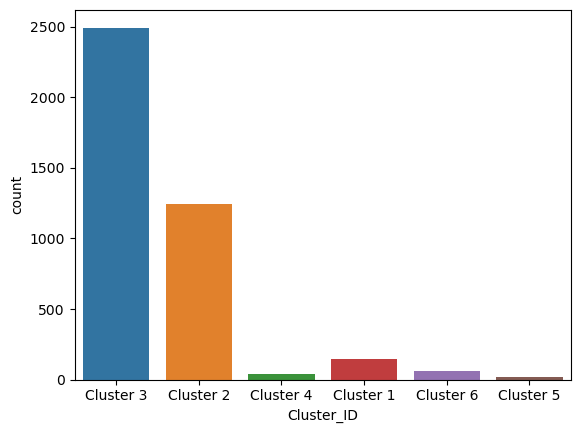

In [44]:
sns.countplot(x=Kalgos['Cluster_ID'])
plt.show()

Cluster 1,4,5 and 6 have very less or negligible number of points compared to cluster 2 and 3, so if we try 2 clusters with Normalized dataset, we may get better results, as we also have silhouette score higher than standaradized data with 6 cluster
(0.53>0.33).

# Building Kmeans algorithm with 2 clusters and Normalized data

In [45]:
#Building Kmeans Model
clusters_n = KMeans(2, random_state= 0)
clusters_n.fit(norm_data)

KMeans(n_clusters=2, random_state=0)

In [46]:
#Cluster Assignments
clusters_n.labels_

array([1, 1, 1, ..., 0, 1, 1])

In [47]:
#Adding Cluster column to original dataset
kalgon = data.copy()
kalgon['Cluster_ID'] = clusters_n.labels_
kalgon

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Cluster_ID
ID,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,1
2,19244,0,1,1,1,215,2,0,0,6968,0,1
3,41354,0,1,1,1,4123,4,0,0,7034,0,1
4,14776,0,1,1,1,500,1,0,0,6952,0,1
5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
4018,64385,0,1,1,1,981,5,0,0,1395,1,0
4019,73597,0,3,1,1,25447,8,0,0,1402,1,0


In [48]:
#Centroids of each clusters (11 dimensional 6 clusters)
clusters_n.cluster_centers_

array([[ 5.69280197e-02,  2.15461508e-02,  4.15428764e-01,
         7.76502363e-03,  4.55773126e-03,  1.09621005e-01,
         1.83518364e-01,  2.78255837e-02,  4.90489598e-02,
         5.57398375e-01,  1.00000000e+00],
       [ 3.50949497e-02,  7.86125463e-03,  1.76400477e-01,
         6.95272149e-03,  2.18514104e-03,  3.88029372e-02,
         1.06355850e-01,  7.34601684e-03,  1.23162495e-02,
         4.60517912e-01, -3.27515792e-15]])

In [49]:
#renaming clusters
kalgon['Cluster_ID']=kalgon['Cluster_ID'].replace(0, 'Cluster 1')
kalgon['Cluster_ID']=kalgon['Cluster_ID'].replace(1, 'Cluster 2')
kalgon

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Cluster_ID
ID,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,Cluster 2
2,19244,0,1,1,1,215,2,0,0,6968,0,Cluster 2
3,41354,0,1,1,1,4123,4,0,0,7034,0,Cluster 2
4,14776,0,1,1,1,500,1,0,0,6952,0,Cluster 2
5,97752,0,4,1,1,43300,26,2077,4,6935,1,Cluster 1
...,...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1,Cluster 1
4018,64385,0,1,1,1,981,5,0,0,1395,1,Cluster 1
4019,73597,0,3,1,1,25447,8,0,0,1402,1,Cluster 1


In [50]:
kalgon.groupby('Cluster_ID').agg(['mean'])

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Cluster_ID,,,,,,,,,,,
Cluster 1,97053.051317,240.196489,2.661715,1.015530,1.018231,28905.414585,15.782579,857.501013,2.599595,4625.062120,1.0
Cluster 2,59831.203814,87.637267,1.705602,1.013905,1.008741,10231.752483,9.146603,226.382201,0.652761,3821.535558,0.0


In [51]:
kalgon['Cluster_ID'].value_counts()

Cluster 2    2517
Cluster 1    1481
Name: Cluster_ID, dtype: int64

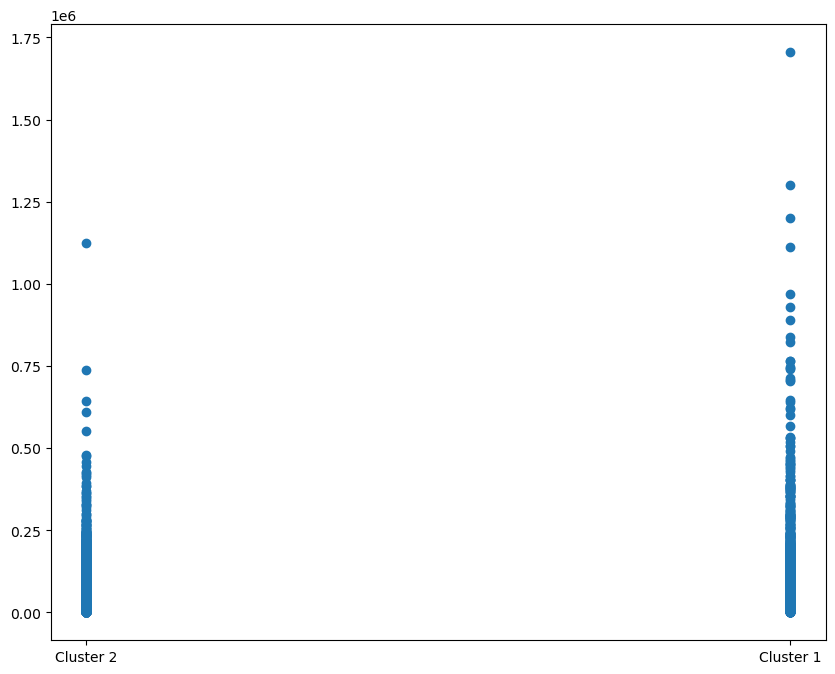

In [52]:
#plotting the clusters
plt.figure(figsize=(10,8))
plt.scatter(kalgon['Cluster_ID'],kalgon['Balance'])
plt.show()

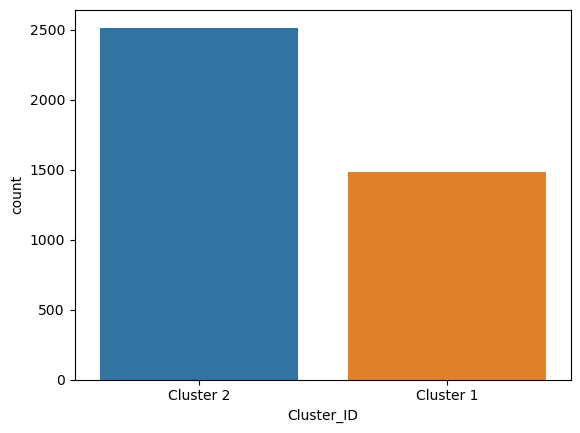

In [53]:
sns.countplot(x=kalgon["Cluster_ID"])
plt.show()

# Conclusion:-


<b>Cluster 1</b>:- Is a group of fliers that are Frequent Flyers and earn most out of cards. 

<b>Cluster 2</b>:- Is a group of fliers that less Frequent Flyers and earn least out of cards.
 

# Hierarchical Clustering

Hierarchical clustering is a type of unsupervised clustering algorithm used for clustering unlabelled data.

It groups data points with similar properties together in a cluster.

The output of the hierarchical clustering is inverted tree shaped structure called Dendrogram.

There are <b>two types of hierarchical clustering</b> :-

1. <b> Agglometric Clustering </b> :-
The Data Points are Clustered using Bottom-Up approch. It starts with a single data point, making a cluster of 2 data point, and then combine the clusters to form a bigger clusters.  
2. <b>Divisive Clustering</b>:-
It has Top-Bottom approach. The whole dataset set is initially treated as a single cluster, then it is divided into different clusters.

In Agglometric Clustering we find the distance of every point to every other point, then combine the two points eith minimum distances into a cluster. Repeat this process for every other points.

But at some point, we will have to claculate distances between 2 clusters or 1 cluster and 1 point. For that purpose there are <b>4 linkage techniques </b>:-
1. single-linkage, 2.complete-linkage, 3.average-linkage, 4.ward-linkage.

single uses the minimum of the distances between all observations of the two sets.

complete or maximum linkage uses the maximum distances between all observations of the two sets.

average uses the average of the distances of each observation of the two sets.

ward minimizes the variance of the clusters being merged.

The main thing in Agglometric Clustering is to repeatedly combine the two nearest clusters.

In [20]:
import scipy.cluster.hierarchy as sch #to draw dendrogram
from sklearn.cluster import AgglomerativeClustering  #for model building

In [55]:
#Dendrogram on Standardized Dataset
for method in ['Single','Complete','Average','Centroid']:
    plt.figure(figsize=(10,8))
    

In [56]:
Dendrogram1 = sch.dendrogram(sch.linkage(std_data, method='complete'))
Dendrogram1

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [10.0, 10.0, 30.0, 30.0],
  [75.0, 75.0, 85.0, 85.0],
  [65.0, 65.0, 80.0, 80.0],
  [55.0, 55.0, 72.5, 72.5],
  [45.0, 45.0, 63.75, 63.75],
  [125.0, 125.0, 135.0, 135.0],
  [115.0, 115.0, 130.0, 130.0],
  [105.0, 105.0, 122.5, 122.5],
  [155.0, 155.0, 165.0, 165.0],
  [175.0, 175.0, 185.0, 185.0],
  [160.0, 160.0, 180.0, 180.0],
  [145.0, 145.0, 170.0, 170.0],
  [113.75, 113.75, 157.5, 157.5],
  [95.0, 95.0, 135.625, 135.625],
  [54.375, 54.375, 115.3125, 115.3125],
  [195.0, 195.0, 205.0, 205.0],
  [225.0, 225.0, 235.0, 235.0],
  [215.0, 215.0, 230.0, 230.0],
  [200.0, 200.0, 222.5, 222.5],
  [245.0, 245.0, 255.0, 255.0],
  [211.25, 211.25, 250.0, 250.0],
  [295.0, 295.0, 305.0, 305.0],
  [285.0, 285.0, 300.0, 300.0],
  [275.0, 275.0, 292.5, 292.5],
  [265.0, 265.0, 283.75, 283.75],
  [315.0, 315.0, 325.0, 325.0],
  [335.0, 335.0, 345.0, 345.0],
  [355.0, 355.0, 365.0, 365.0],
  [340.0, 340.0, 360.0, 360.0],
  [375.0, 

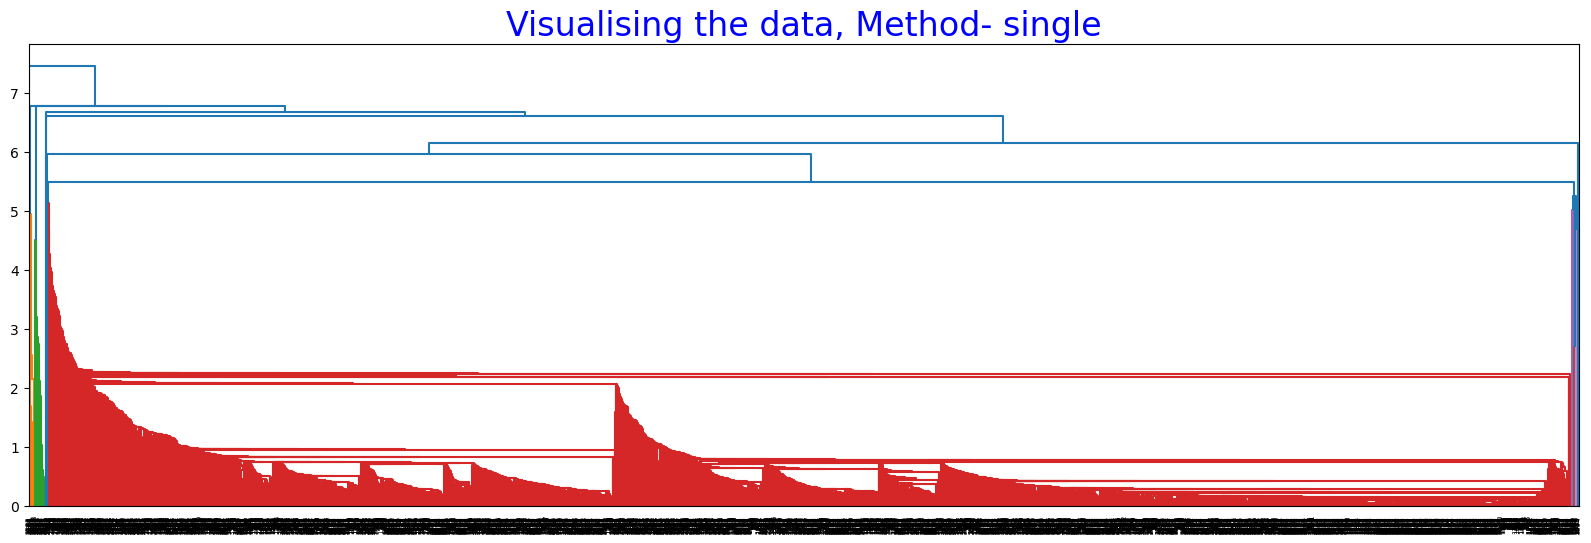

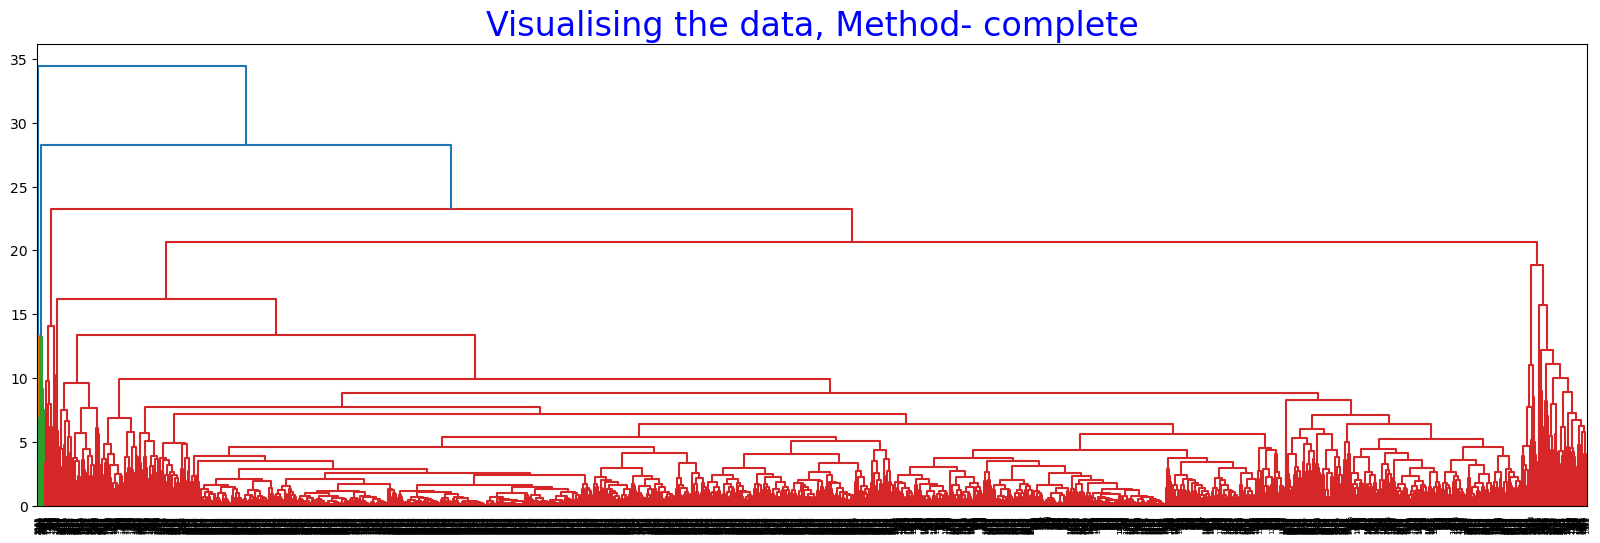

In [ ]:
for methods in ['single','complete','average','centroid']: 
    plt.figure(figsize =(20, 6)) 
    
    dict = {'fontsize':24,'fontweight' :16, 'color' : 'blue'}
    
    plt.title('Visualising the data, Method- {}'.format(methods),fontdict = dict) 
    Dendrogram1 = sch.dendrogram(sch.linkage(std_data, method = methods,optimal_ordering=False))
    plt.show()

In [130]:
n_clus = [2,3,4,5,6,7,8,9]

for n_clus in n_clus:
    for linkage in ['single', 'complete', 'average', 'ward']:
        hie_cluster = AgglomerativeClustering(n_clusters= n_clus, linkage= linkage)
        hie_labels = hie_cluster.fit_predict(X = std_data)
        silhou_score = silhouette_score(std_data, hie_labels)
        print("In Standardized dataset for n_clus = ", n_clus, "with Linkage Method ", linkage, "The Silhouette Score is: "
              , silhou_score)
    print()
        

In Standardized dataset for n_clus =  2 with Linkage Method  single The Silhouette Score is:  0.8562622335599249
In Standardized dataset for n_clus =  2 with Linkage Method  complete The Silhouette Score is:  0.8110876003700274
In Standardized dataset for n_clus =  2 with Linkage Method  average The Silhouette Score is:  0.8110876003700274
In Standardized dataset for n_clus =  2 with Linkage Method  ward The Silhouette Score is:  0.28915604880621426

In Standardized dataset for n_clus =  3 with Linkage Method  single The Silhouette Score is:  0.7350131896585496
In Standardized dataset for n_clus =  3 with Linkage Method  complete The Silhouette Score is:  0.7760498283333268
In Standardized dataset for n_clus =  3 with Linkage Method  average The Silhouette Score is:  0.7838424148089893
In Standardized dataset for n_clus =  3 with Linkage Method  ward The Silhouette Score is:  0.2939395016802131

In Standardized dataset for n_clus =  4 with Linkage Method  single The Silhouette Score is

In [ ]:
for methods in ['single','complete','average','centroid']: 
    plt.figure(figsize =(20, 6)) 
    
    dict = {'fontsize':24,'fontweight' :16, 'color' : 'blue'}
    
    plt.title('Visualising the data, Method- {}'.format(methods),fontdict = dict) 
    Dendrogram1 = sch.dendrogram(sch.linkage(norm_data, method = methods,optimal_ordering=False))
    plt.show()

In [131]:
n_clus = [2,3,4,5,6,7,8,9]
for n_clus in n_clus:
    for linkage in ['single', 'complete', 'average', 'ward']:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clus, linkage=linkage)
        hie_labels1 = hie_cluster1.fit_predict(norm_data)
        silhou_score1 = silhouette_score(norm_data, hie_labels1)
        print("In Normalized dataset for n_clus = ", n_clus, "with Linkage Method ", linkage, "The Silhouette Score is: "
              , silhou_score1)
    print()

In Normalized dataset for n_clus =  2 with Linkage Method  single The Silhouette Score is:  0.535888544052936
In Normalized dataset for n_clus =  2 with Linkage Method  complete The Silhouette Score is:  0.4703657329091562
In Normalized dataset for n_clus =  2 with Linkage Method  average The Silhouette Score is:  0.4703657329091562
In Normalized dataset for n_clus =  2 with Linkage Method  ward The Silhouette Score is:  0.535888544052936

In Normalized dataset for n_clus =  3 with Linkage Method  single The Silhouette Score is:  0.5351186081149816
In Normalized dataset for n_clus =  3 with Linkage Method  complete The Silhouette Score is:  0.5318364582439801
In Normalized dataset for n_clus =  3 with Linkage Method  average The Silhouette Score is:  0.3961439228235289
In Normalized dataset for n_clus =  3 with Linkage Method  ward The Silhouette Score is:  0.43545231881947005

In Normalized dataset for n_clus =  4 with Linkage Method  single The Silhouette Score is:  0.481243032691843

In Standardized dataset for n_clus =  2 with Single Linkage Method   The Silhouette Score is:  0.8562622335599249. The highest of all the scores. So we will move ahead with this choice.

# Perfoming Hierachical Clustering with 2 cluster and Single Linkage Method using Standardized Dataset.

In [135]:
hcluster = AgglomerativeClustering(n_clusters=2 , linkage='single')
hcluster

AgglomerativeClustering(linkage='single')

In [136]:
hlabels = hcluster.fit_predict(std_data)
hlabels

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [138]:
#Assgining clusters to the dataset
halgos = data.copy()
halgos['Cluster_ID'] = hlabels
halgos

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Cluster_ID
ID,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,0
2,19244,0,1,1,1,215,2,0,0,6968,0,0
3,41354,0,1,1,1,4123,4,0,0,7034,0,0
4,14776,0,1,1,1,500,1,0,0,6952,0,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
4018,64385,0,1,1,1,981,5,0,0,1395,1,0
4019,73597,0,3,1,1,25447,8,0,0,1402,1,0


In [140]:
#renaming clusters
halgos['Cluster_ID']=halgos['Cluster_ID'].replace(0, 'Cluster 1')
halgos['Cluster_ID']=halgos['Cluster_ID'].replace(1, 'Cluster 2')
halgos

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Cluster_ID
ID,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,Cluster 1
2,19244,0,1,1,1,215,2,0,0,6968,0,Cluster 1
3,41354,0,1,1,1,4123,4,0,0,7034,0,Cluster 1
4,14776,0,1,1,1,500,1,0,0,6952,0,Cluster 1
5,97752,0,4,1,1,43300,26,2077,4,6935,1,Cluster 1
...,...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1,Cluster 1
4018,64385,0,1,1,1,981,5,0,0,1395,1,Cluster 1
4019,73597,0,3,1,1,25447,8,0,0,1402,1,Cluster 1


In [142]:
halgos['Cluster_ID'].value_counts()

Cluster 1    3997
Cluster 2       1
Name: Cluster_ID, dtype: int64

To our disappointment we didn't get the desired result.  Lets try out other combination. Lets try out from normalized dataset.
0.535888544052936 is the highest score in normalized dataset, with 2 clusters with single and ward linkage methods. We will now go with ward linkage method.

# Perfoming Hierachical Clustering with 2 cluster and Ward Linkage Method using Normalized Dataset.

In [175]:
hcluster1 =AgglomerativeClustering(n_clusters= 2, linkage='ward')
hlabel1 = hcluster1.fit_predict(norm_data)
hlabel1

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [179]:
#Assgining clusters to the dataset
halgos = data.copy()
halgos['Cluster_ID'] = hlabel1
halgos

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Cluster_ID
ID,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,0
2,19244,0,1,1,1,215,2,0,0,6968,0,0
3,41354,0,1,1,1,4123,4,0,0,7034,0,0
4,14776,0,1,1,1,500,1,0,0,6952,0,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
4018,64385,0,1,1,1,981,5,0,0,1395,1,1
4019,73597,0,3,1,1,25447,8,0,0,1402,1,1


In [180]:
#renaming clusters
halgos['Cluster_ID']=halgos['Cluster_ID'].replace(0, 'Cluster 1')
halgos['Cluster_ID']=halgos['Cluster_ID'].replace(1, 'Cluster 2')
halgos

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Cluster_ID
ID,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,Cluster 1
2,19244,0,1,1,1,215,2,0,0,6968,0,Cluster 1
3,41354,0,1,1,1,4123,4,0,0,7034,0,Cluster 1
4,14776,0,1,1,1,500,1,0,0,6952,0,Cluster 1
5,97752,0,4,1,1,43300,26,2077,4,6935,1,Cluster 2
...,...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1,Cluster 2
4018,64385,0,1,1,1,981,5,0,0,1395,1,Cluster 2
4019,73597,0,3,1,1,25447,8,0,0,1402,1,Cluster 2


In [181]:
halgos['Cluster_ID'].value_counts()

Cluster 1    2517
Cluster 2    1481
Name: Cluster_ID, dtype: int64

In [182]:
halgos.groupby('Cluster_ID').agg(['mean'])

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Cluster_ID,,,,,,,,,,,
Cluster 1,59831.203814,87.637267,1.705602,1.013905,1.008741,10231.752483,9.146603,226.382201,0.652761,3821.535558,0.0
Cluster 2,97053.051317,240.196489,2.661715,1.015530,1.018231,28905.414585,15.782579,857.501013,2.599595,4625.062120,1.0


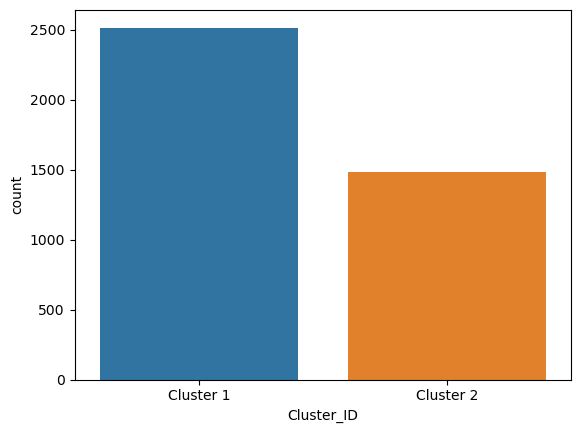

In [183]:
sns.countplot(x=halgos["Cluster_ID"])
plt.show()

# Conclusion

<b>Cluster 2</b>:- Is a group of fliers that are Frequent Flyers and earn most out of cards. 

<b>Cluster 1</b>:- Is a group of fliers that less Frequent Flyers and earn least out of cards.
 

# DBSCAN (Density Based Spatial Clustering of Application with Noise)

<b>Why DBSCAN ?</b>

Because K-Means requires one to specify the number of clusters prior (the K value) but we can't know how many cluster are hidden in that dataset. It also does not perform well on finding non-convex/ non-spherical shapes of cluster.
K-Means is sensitive to noise data. K-Means is also computationally expensive.

DBSCAN algorithm is comparitivly less expensive.

DBSCAN is able to identify noise points.

<b>DBSCAN algorithm has two parameters :-</b>
1. <b>eps</b> :- Epsilon Neighbourhood. It is the distance from a point(lets call it home point). The other points with distance less than eps from the home point are considered as Epsilon Neighbourhood.


2. <b>minpts</b> :- Minimum Points. The minimum number of points required to be inside the epsilon neighbourhood to call a region as Dense Region.

<b>After DBSCAN clustering is completed we have 3 types of points:-</b>

1. <b>Core Point</b> :- The point around which, if we consider epsilon neighbourhood and if that certain neighbourhood contains atleast minpts (i.e. it is dense) then that point is called as Core Point.


2. <b>Border Point</b> :- If we consider Epsilon Neighbourhood around a certain point and that region is not a dense one (i.e. it contains points less then minpts) but that point itself is present in Epsilon Neighbourhood of some another datapoint and that another datapoint is a core point. Then this point will be called as Border Point.


3. <b>Noise Point</b> :- If a point is not a Core Point and not a Border Point as well then that point is called as Noise Point

<b>Their are another 3 concepts related to DBSCAN:-</b>

1. <b>Directly Density Reachable</b> :- Lets have a point x and another point y. Point y will be Directly Density reachable from point x if - a. Point y belongs to the Epsilon Neighbourhood from Point x, b. Point x is a Core Point.


2. <b>Density Reachable</b> :- Point y is Density Reachable from Point x if there is a path of points between Point x and Point y, where each point in the path is Directly Density Reachable from the previous point. This means all the points on the path are Core Points with possible exception of Point y.


3. <b>Density Connected</b> :- A POint x is Density connected to a Point y, if there is a Point z that both Point x and Point y are density reachable from.


This way DBSCAN connects core objects and their neighbours in a dense region.

When forming a cluster in DBSCAN it will start with a random point and will search all the density reachable points and repeat this process until there is no Density Reachable point. This will be first cluster then it will start second cluster.

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

In [72]:
from collections import Counter #For counting the number of data points in each cluster
from sklearn.neighbors import NearestNeighbors

In [91]:
st = StandardScaler()
stdDf = pd.DataFrame(st.fit_transform(data), columns=data.columns)

In [92]:
#Lets use NearestNeighbors to roughly find the optimal value of eps
nn = NearestNeighbors(n_neighbors = 20).fit(stdDf)
distances, indices = nn.kneighbors(stdDf)

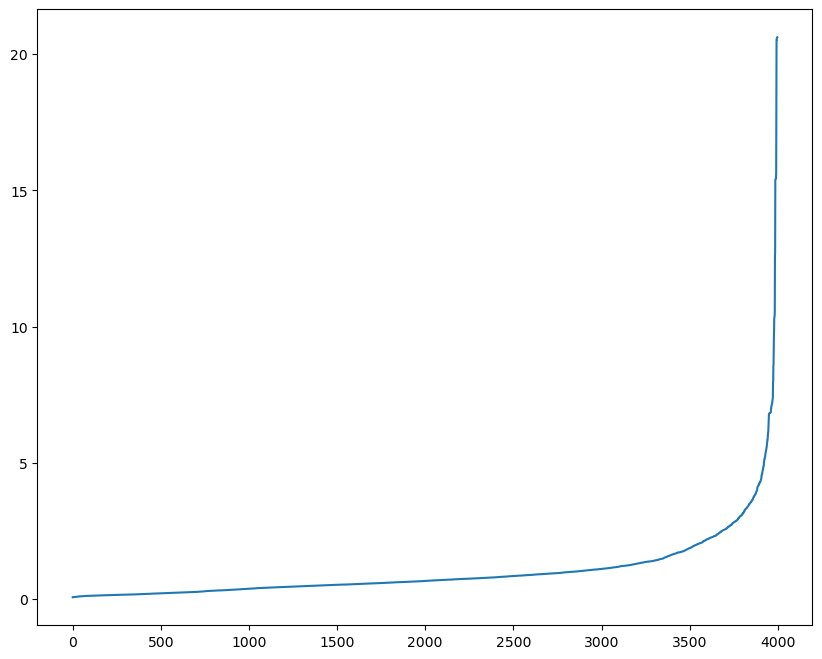

In [95]:
distances = np.sort(distances, axis=0)
distances = distances[:,-1]
plt.figure(figsize=(10,8))
plt.plot(distances)
plt.show()

Lets consider eps from 2 to 5 and min sample range 15 to 25 and iterate over these combinations and get the best silhouette score

In [96]:
min_samples = range(15, 26)
eps = np.arange(2.0,5.0,0.25)

In [97]:
output = []

for ms in min_samples:
    for ep in eps:
        labels = DBSCAN(min_samples = ms, eps = ep).fit(stdDf).labels_
        score = silhouette_score(stdDf, labels)
        output.append((ms, ep, score))

Getting parameters for best silhouette score

In [104]:
min_samples, eps, score = sorted(output, key=lambda x:x[-1])[-1]
print(f"Best silhouette_score: {score}")
print(f"min_samples: {min_samples}")
print(f"eps: {eps}")

Best silhouette_score: 0.675447033434764
min_samples: 25
eps: 3.25


Get the number of clusters and outliers for DBSCAN with best parameters

In [107]:
labels = DBSCAN(min_samples=min_samples, eps = 3.25).fit(stdDf).labels_
clusters = len(Counter(labels))
print(f"Number of Cluster: {clusters}")
print(f"Number of outliers: {Counter(labels)[-1]}")
print(f"Silhouette Score: {silhouette_score(std_data, labels)}")

Number of Cluster: 2
Number of outliers: 131
Silhouette Score: 0.675447033434764


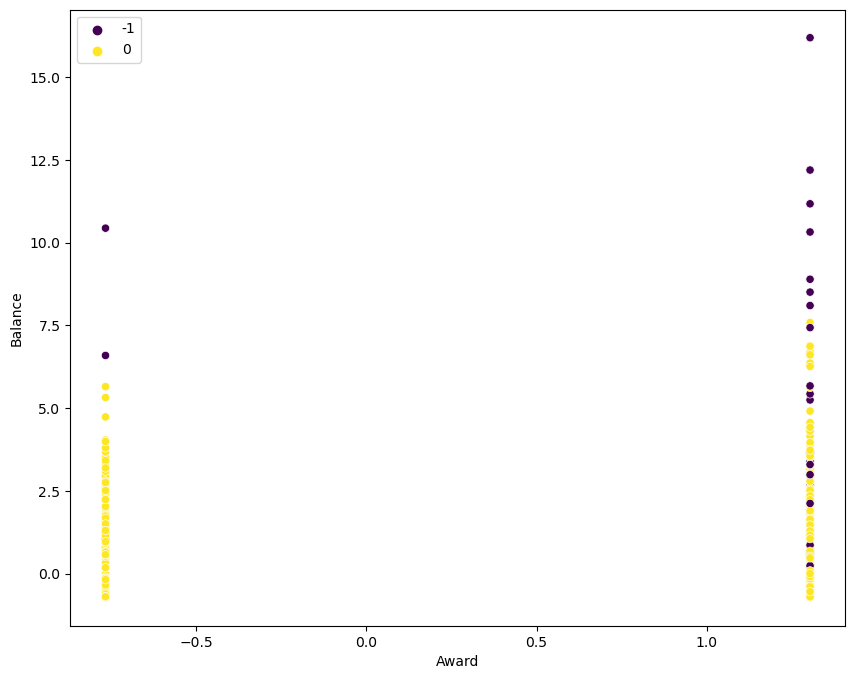

In [111]:
plt.figure(figsize=(10,8))
sns.scatterplot(x= stdDf['Award'], y=stdDf['Balance'], hue=labels, palette='viridis')
plt.show()

In [ ]:
#Lets also try using Normalized Data

In [114]:
from sklearn.preprocessing import MinMaxScaler
MinMax = MinMaxScaler()
normDf = pd.DataFrame(MinMax.fit_transform(data), columns=data.columns)

In [115]:
#Lets use NearestNeighbors to roughly find the optimal value of eps
nn = NearestNeighbors(n_neighbors = 20).fit(normDf)
distances, indices = nn.kneighbors(normDf)

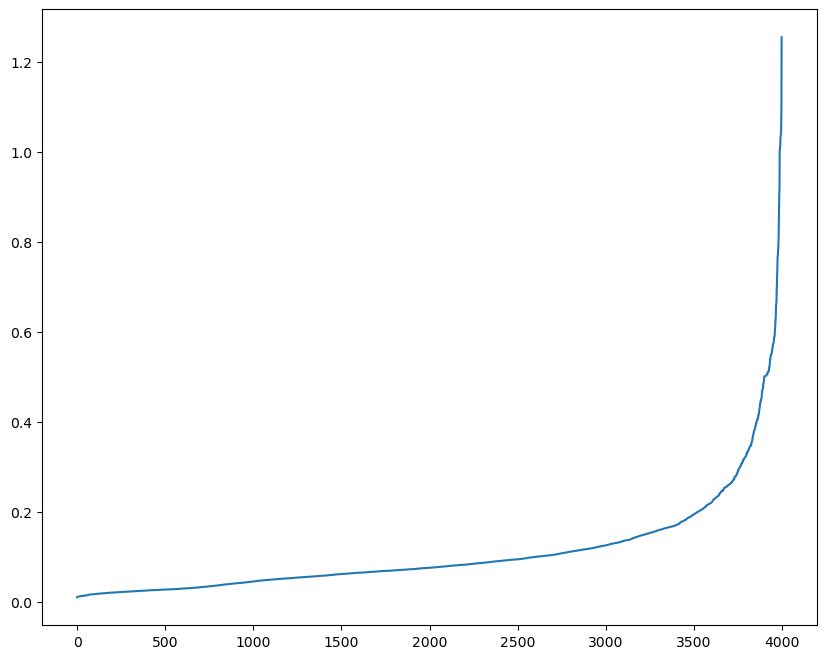

In [116]:
distances = np.sort(distances, axis=0)
distances = distances[:,-1]
plt.figure(figsize=(10,8))
plt.plot(distances)
plt.show()

Lets consider eps from 0.1 to 0.5 and min sample range 15 to 25 and iterate over these combinations and get the best silhouette score

In [117]:
min_samples = range(15, 26)
eps = np.arange(0.1,0.5,0.025)

In [119]:
output = []

for ms in min_samples:
    for ep in eps:
        labels = DBSCAN(min_samples = ms, eps = ep).fit(normDf).labels_
        score = silhouette_score(normDf, labels)
        output.append((ms, ep, score))

Getting parameters for best silhouette score

In [120]:
min_samples, eps, score = sorted(output, key=lambda x:x[-1])[-1]
print(f"Best silhouette_score: {score}")
print(f"min_samples: {min_samples}")
print(f"eps: {eps}")

Best silhouette_score: 0.5264082933135833
min_samples: 25
eps: 0.42499999999999993


Get the number of clusters and outliers for DBSCAN with best parameters

In [121]:
labels = DBSCAN(min_samples=min_samples, eps = 3.25).fit(normDf).labels_
clusters = len(Counter(labels))
print(f"Number of Cluster: {clusters}")
print(f"Number of outliers: {Counter(labels)[-1]}")
print(f"Silhouette Score: {silhouette_score(std_data, labels)}")

Number of Cluster: 2
Number of outliers: 131
Silhouette Score: 0.675447033434764


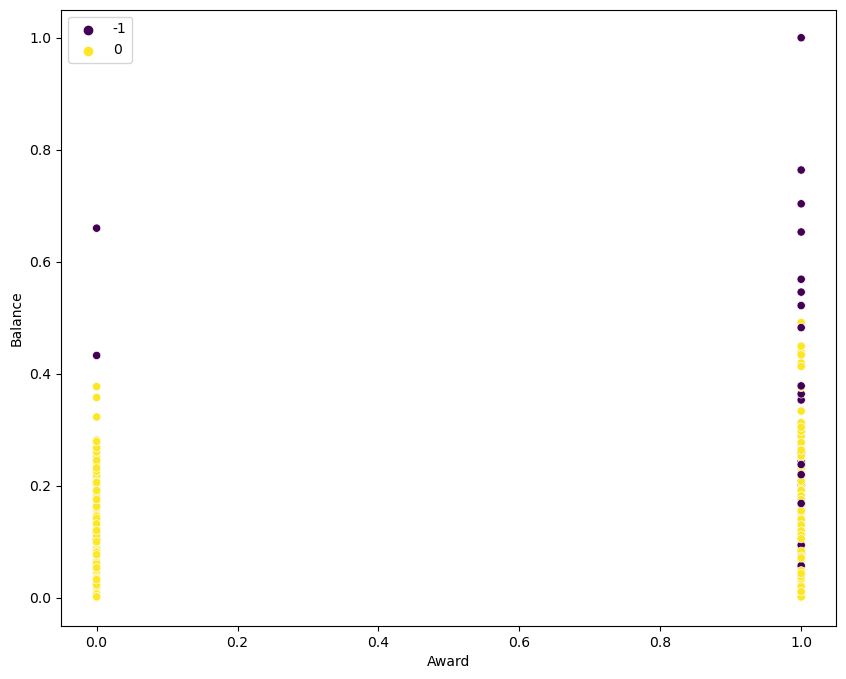

In [122]:
plt.figure(figsize=(10,8))
sns.scatterplot(x= normDf['Award'], y=normDf['Balance'], hue=labels, palette='viridis')
plt.show()